In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
from tqdm import tqdm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import math
from sklearn import linear_model
from sklearn import ensemble
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
pd.set_option('display.max_columns', 999)

In [3]:
df_train = pd.read_csv(r"E:\Rabin\Machine Learning\house-prices-advanced-regression-techniques\train.csv")
df_test = pd.read_csv(r"E:\Rabin\Machine Learning\house-prices-advanced-regression-techniques\test.csv")
df_train1 = pd.read_csv(r"E:\Rabin\Machine Learning\house-prices-advanced-regression-techniques\train.csv")
df_test1 = pd.read_csv(r"E:\Rabin\Machine Learning\house-prices-advanced-regression-techniques\test.csv")

In [4]:
df_final = pd.concat([df_train,df_test],ignore_index=True)

C:\Users\Rabin\Desktop\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [5]:
df_final.shape

(2919, 81)

# Looking for outliers and removing the extreme outlieres

In [6]:
cat_cols = list(df_train.select_dtypes(include=['object']).columns)
num_cols = list(df_train.select_dtypes(exclude=['object']).columns)

In [7]:
## List of numerial columns in train set
num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [8]:
## making dataframe for only numerial and categorical columns
df_num = df_train[num_cols]
df_col = df_train[cat_cols]

In [9]:
## looking for correlation for numerical columns with sale price
df_num_corr = df_num.corr()
df_num_corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [10]:
df_train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [11]:
df_test.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459,1459,1458,1458,1443,1444.000000,1459,1459,1459,1415,1414,1415,1417,1458.000000,1417,1458.000000,1458.000000,1458.000000,1459,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458,1459.000000,1457,1459.00000,729,1383,1381.000000,1381,1458.000000,1458.000000,1381,1381,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,5,3,25,9,5,5,7,NaN,NaN,NaN,NaN,6,4,13,15,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,4,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,4,5,3,NaN,NaN,NaN,NaN,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1114,NaN,NaN,1453,70,934,1311,1457,1081,1396,218,1251,1444,1205,745,NaN,NaN,NaN,NaN,1169,1442,510,510,878,NaN,892,1256,661,634,1295,951,431,NaN,1237,NaN,NaN,NaN,1446,752,1358,1337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,757,NaN,1357,NaN,364,853,NaN,625,NaN,NaN,1293,1328,1301,NaN,NaN,NaN,NaN,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,2190.000000,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.078821,5.553804,1971.357779,1983.662783,NaN,NaN,NaN,NaN,NaN,100.709141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439.203704,NaN,52.619342,554.294925,1046.117970,NaN,NaN,NaN,NaN,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,NaN,6.385195,NaN,0.58122,NaN,NaN,1977.721217,NaN,1.766118,472.768861,NaN,NaN,NaN,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,421.321334,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436812,1.113740,30.390071,21.130467,NaN,NaN,NaN,NaN,NaN,177.625900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.268042,NaN,176.753926,437.260486,442.898624,NaN,NaN,NaN,NaN,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,NaN,1.508895,NaN,0.64742,NaN,NaN,26.431175,NaN,0.775945,217.048611,NaN,NaN,NaN,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,1461.000000,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1879.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,NaN,0.00000,NaN,NaN,1895.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0

# LotFrontage

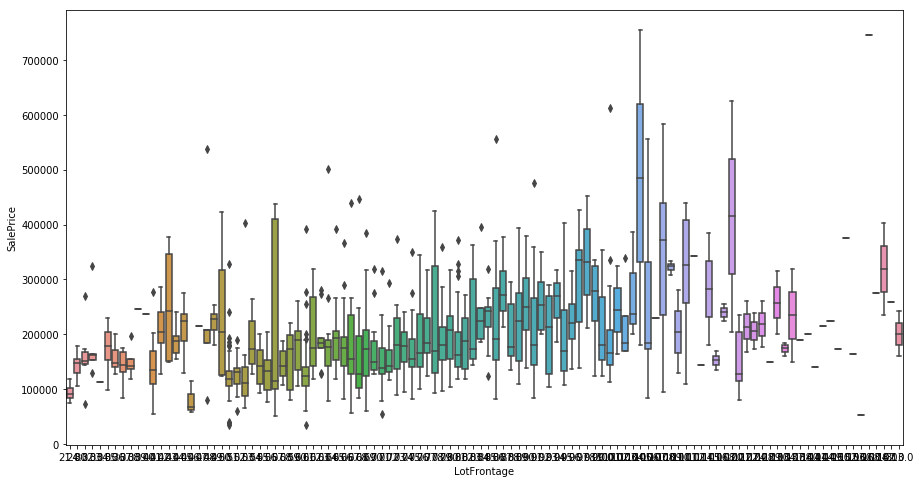

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(x='LotFrontage',y='SalePrice',data=df_train1)

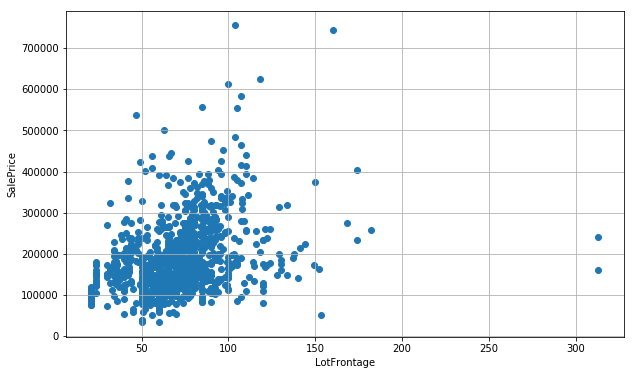

In [13]:
plt.figure(figsize=(10,6))
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.scatter(x='LotFrontage',y='SalePrice',data=df_train1)
plt.grid()

In [14]:
df = df_train[df_train['LotFrontage']==313]

In [15]:
## removing the rows having LotFrontage value extremely high
df_train.drop(df_train[df_train['LotFrontage']==313].index,inplace=True)

# LotArea

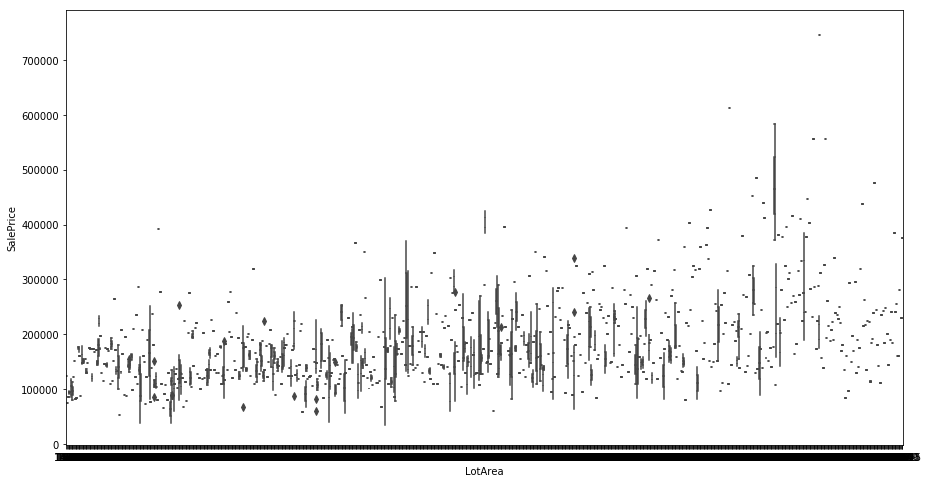

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(x='LotArea',y='SalePrice',data=df_train1)

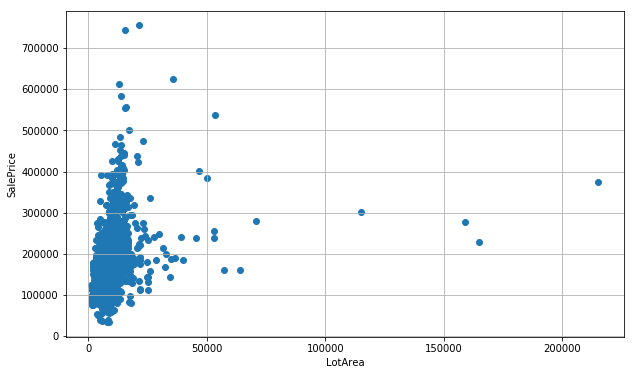

In [17]:
plt.figure(figsize=(10,6))
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.scatter(x='LotArea',y='SalePrice',data=df_train1)
plt.grid()

In [18]:
df_lotarea = df_train1[df_train1['LotArea']>100000]#215245]
df_lotarea

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


In [19]:
## removing the rows having LotArea value extremely high
df_train.drop(df_train[df_train['LotArea']>100000].index,inplace=True)
df_train.shape

(1454, 81)

# MasVnrArea

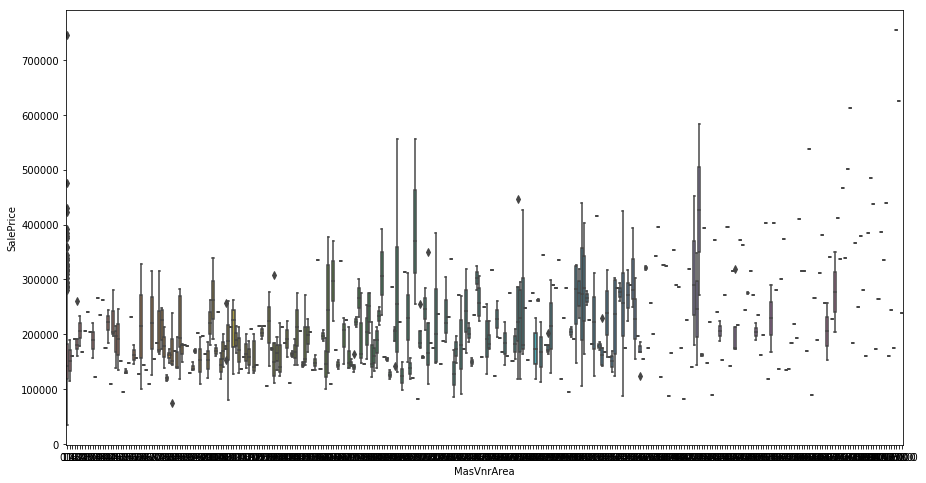

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot(x='MasVnrArea',y='SalePrice',data=df_train1)

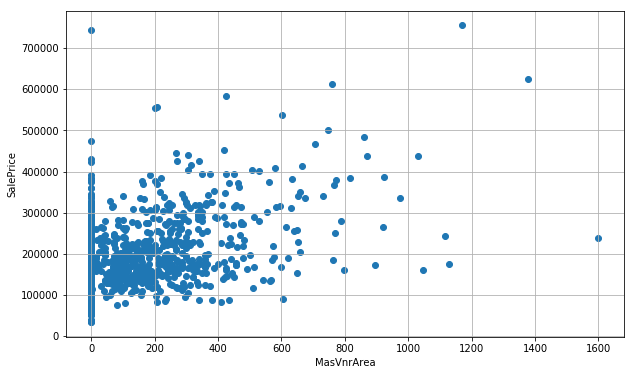

In [21]:
plt.figure(figsize=(10,6))
plt.xlabel("MasVnrArea")
plt.ylabel("SalePrice")
plt.scatter(x='MasVnrArea',y='SalePrice',data=df_train1)
plt.grid()

In [22]:
df_masvnrarea = df_train1[df_train1['MasVnrArea']>1300]
df_masvnrarea

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649,Unf,0,326,975,GasA,Ex,Y,SBrkr,975,975,0,1950,0,0,2,1,3,1,Gd,7,Typ,1,TA,Detchd,1997.0,RFn,2,576,TA,TA,Y,0,10,0,0,198,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


In [23]:
## removing rows having high value of MasVnrArea
df_train.drop(df_train[df_train['MasVnrArea']>1300].index,inplace=True)
df_train.shape

(1452, 81)

# BsmtFinSF1

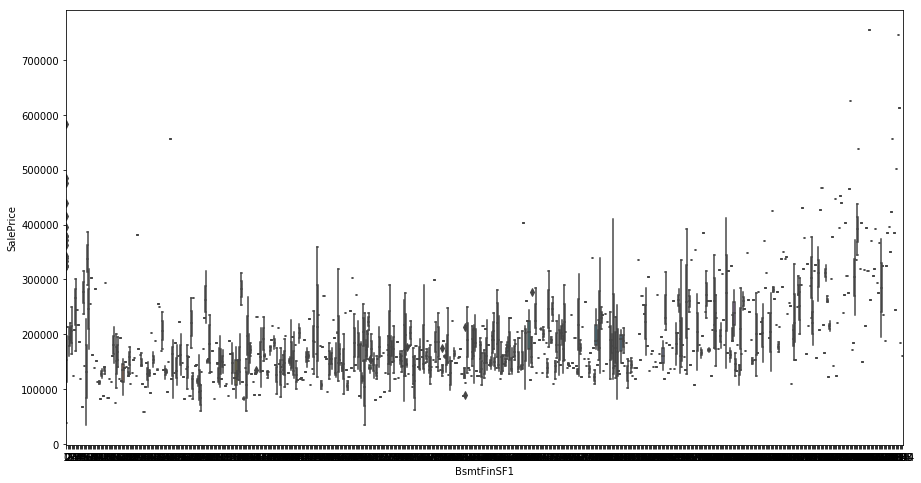

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(x='BsmtFinSF1',y='SalePrice',data=df_train1)

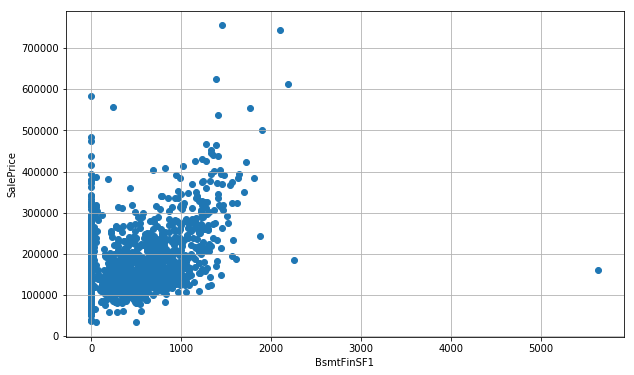

In [25]:
plt.figure(figsize=(10,6))
plt.xlabel("BsmtFinSF1")
plt.ylabel("SalePrice")
plt.scatter(x='BsmtFinSF1',y='SalePrice',data=df_train1)
plt.grid()

In [26]:
df_bsmtfinsf1 = df_train1[df_train1['BsmtFinSF1']==5644]
df_bsmtfinsf1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [27]:
## removing rows having high value of BsmtFinSF1
df_train.drop(df_train[df_train['BsmtFinSF1']==5644].index,inplace=True)
df_train.shape

(1452, 81)

# GrLivArea

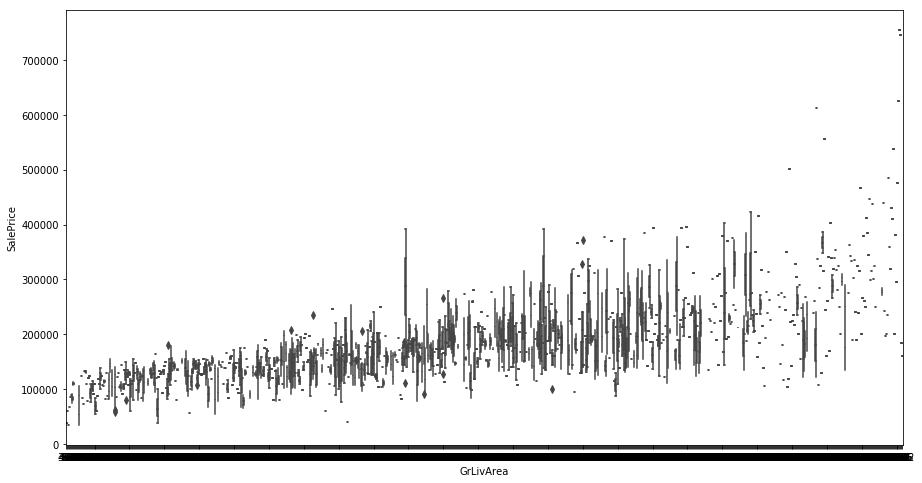

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(x='GrLivArea',y='SalePrice',data=df_train1)

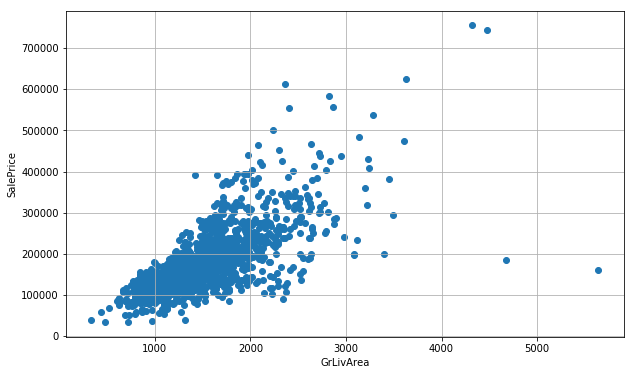

In [29]:
plt.figure(figsize=(10,6))
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(x='GrLivArea',y='SalePrice',data=df_train1)
plt.grid()

In [30]:
df_grlivarea = df_train1[df_train1['GrLivArea']>5000]
df_grlivarea

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [31]:
## removing rows having high value of GrLivArea
df_train.drop(df_train[df_train['GrLivArea']>5000].index,inplace=True)
df_train.shape

(1452, 81)

# Handling missing value 

In [32]:
df_final = pd.concat([df_train,df_test],ignore_index=True)
df_final.head(3)

C:\Users\Rabin\Desktop\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008


In [33]:
df_final.isna().sum().sort_values(ascending=False)

PoolQC           2902
MiscFeature      2808
Alley            2714
Fence            2340
SalePrice        1459
FireplaceQu      1420
LotFrontage       483
GarageFinish      159
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtFullBath        2
BsmtHalfBath        2
Utilities           2
Functional          2
Electrical          1
Exterior2nd         1
KitchenQual         1
Exterior1st         1
GarageCars          1
TotalBsmtSF         1
                 ... 
Neighborhood        0
YearBuilt           0
WoodDeckSF          0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleCondition       0
RoofStyle           0
RoofMatl            0
PoolArea            0
PavedDrive          0
OverallQual         0
OverallCond         0
OpenPorchSF         0
MoSold    

In [34]:
## removing the columns having very high percentage of missing value
df_final.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df_final.shape

(2911, 76)

In [35]:
## columns having missing value
missing_value_final = df_final.isna().sum()
print("Columns having missing value in combined dataset:")
for i in range(0,len(missing_value_final)):
    if missing_value_final[i] != 0:
        print(df_final.columns[i])

Columns having missing value in combined dataset:
BsmtCond
BsmtExposure
BsmtFinSF1
BsmtFinSF2
BsmtFinType1
BsmtFinType2
BsmtFullBath
BsmtHalfBath
BsmtQual
BsmtUnfSF
Electrical
Exterior1st
Exterior2nd
Functional
GarageArea
GarageCars
GarageCond
GarageFinish
GarageQual
GarageType
GarageYrBlt
KitchenQual
LotFrontage
MSZoning
MasVnrArea
MasVnrType
SalePrice
SaleType
TotalBsmtSF
Utilities


In [36]:
df_missing = df_final[['BsmtCond','BsmtExposure','BsmtFinSF1','BsmtFinSF2','BsmtFinType1','BsmtFinType2','BsmtFullBath','BsmtHalfBath','BsmtQual','BsmtUnfSF','Electrical','Exterior1st','Exterior2nd','Functional','GarageArea','GarageCars','GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt','KitchenQual','LotFrontage','MSZoning','MasVnrArea','MasVnrType','SaleType','TotalBsmtSF','Utilities']]
df_missing.head()  

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,Electrical,Exterior1st,Exterior2nd,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,KitchenQual,LotFrontage,MSZoning,MasVnrArea,MasVnrType,SaleType,TotalBsmtSF,Utilities
0,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,SBrkr,VinylSd,VinylSd,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,Gd,65.0,RL,196.0,BrkFace,WD,856.0,AllPub
1,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,SBrkr,MetalSd,MetalSd,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,TA,80.0,RL,0.0,None,WD,1262.0,AllPub
2,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,SBrkr,VinylSd,VinylSd,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,Gd,68.0,RL,162.0,BrkFace,WD,920.0,AllPub
3,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,SBrkr,Wd Sdng,Wd Shng,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,Gd,60.0,RL,0.0,None,WD,756.0,AllPub
4,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,SBrkr,VinylSd,VinylSd,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,Gd,84.0,RL,350.0,BrkFace,WD,1145.0,AllPub


In [37]:
cat_cols_missing = list(df_missing.select_dtypes(include=['object']).columns)
num_cols_missing = list(df_missing.select_dtypes(exclude=['object']).columns)

In [38]:
print(len(cat_cols_missing))
print(len(num_cols_missing))

18
11


# Filling nan value with mode of categorical feature

In [39]:
for col in cat_cols_missing:
    df_final[col] = df_final[col].fillna(df_final[col].mode()[0])

In [40]:
df_final['GarageCars'].fillna(value=df_final['GarageCars'].median(),inplace=True)
df_final['BsmtFinSF2'].fillna(value=df_final['BsmtFinSF2'].median(),inplace=True)
df_final['BsmtFullBath'].fillna(value=df_final['BsmtFullBath'].median(),inplace=True)
df_final['BsmtHalfBath'].fillna(value=df_final['BsmtHalfBath'].median(),inplace=True)
df_final['GarageYrBlt'].fillna(value=df_final['GarageYrBlt'].median(),inplace=True)

In [41]:
df_final['BsmtFinSF1'].fillna(value=df_final['BsmtFinSF1'].mean(),inplace=True)
df_final['BsmtUnfSF'].fillna(value=df_final['BsmtUnfSF'].mean(),inplace=True)
df_final['GarageArea'].fillna(value=df_final['GarageArea'].mean(),inplace=True)
df_final['LotFrontage'].fillna(value=df_final['LotFrontage'].mean(),inplace=True)
df_final['MasVnrArea'].fillna(value=df_final['MasVnrArea'].mean(),inplace=True)
df_final['TotalBsmtSF'].fillna(value=df_final['TotalBsmtSF'].mean(),inplace=True)

# Feature Generation

In [42]:
df_final['TotalHouseArea'] = df_final['1stFlrSF']+df_final['2ndFlrSF']+df_final['TotalBsmtSF']
df_final['YrOldGar'] = df_final['YrSold']-df_final['GarageYrBlt']
df_final['YrOld'] = df_final['YrSold']-df_final['YearBuilt']
df_final['YrRemodOld'] = df_final['YrSold']-df_final['YearRemodAdd']
df_final['TotalArea'] = df_final['1stFlrSF']+df_final['2ndFlrSF']+df_final['TotalBsmtSF']+df_final['GarageArea']
df_final['TotalPorchArea'] = df_final['OpenPorchSF']+df_final['EnclosedPorch']+df_final['3SsnPorch']+df_final['ScreenPorch']
df_final['TotalBsmtBath'] = df_final['BsmtFullBath']+df_final['BsmtHalfBath']

In [43]:
df_final['TotalBath'] = df_final['FullBath']+df_final['HalfBath']

In [44]:
df_final.shape

(2911, 84)

In [45]:
df_final.drop(['Street','Utilities','Condition2','RoofMatl','Heating','GarageQual','GarageCond','LowQualFinSF','KitchenAbvGr','3SsnPorch','PoolArea','MiscVal'],axis=1,inplace=True)

In [46]:
column = ['YrOld','YrRemodOld','YrOldGar']
for col in column:
    for i in range(0,df_final.shape[0]):
        if(str(df_final[col][i])=='-inf'):
            df_final[col][i]=0

In [47]:
cat_cols_final = list(df_final.select_dtypes(include=['object']).columns)
num_cols_final = list(df_final.select_dtypes(exclude=['object']).columns)

In [48]:
df_num_col = df_final[num_cols_final]
df_cat_col = df_final[cat_cols_final]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AADFE0D358>,
      dtype=object)

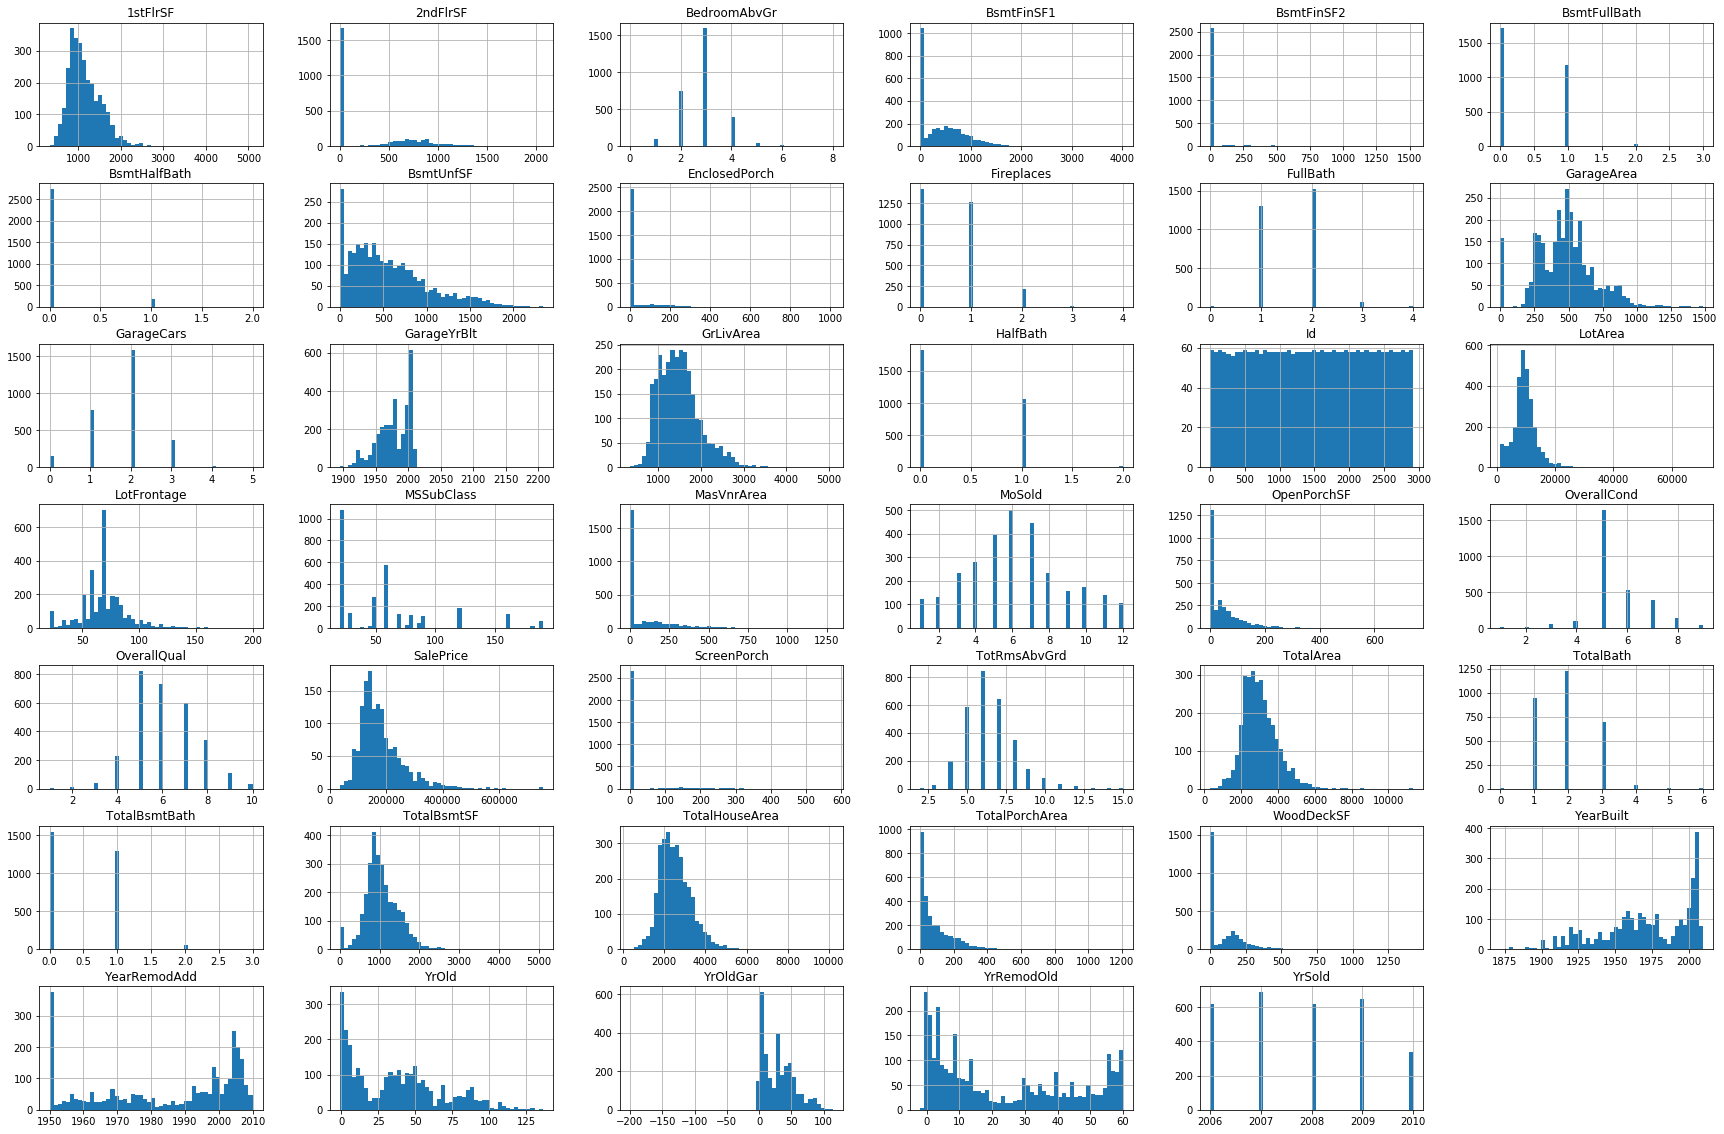

In [49]:
df_num_col.hist(bins=50,figsize=(30,20))

In [50]:
## list of columns having skewed value 
skew = ['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtUnfSF','GrLivArea','GarageArea','GarageYrBlt','LotArea','LotFrontage','SalePrice','WoodDeckSF','TotalPorchArea','YearBuilt','YearRemodAdd','YrOld','YrOldGar','YrRemodOld']#,'YrOld','YrOldGar','YrRemodOld']
for col in skew:
    df_final[col] = np.log1p(df_final[col])

C:\Users\Rabin\Desktop\python\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log1p
  after removing the cwd from sys.path.
C:\Users\Rabin\Desktop\python\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


In [51]:
column = ['YrOld','YrRemodOld','YrOldGar']
for col in column:
    for i in range(0,df_final.shape[0]):
        if(str(df_final[col][i])=='-inf'):
            df_final[col][i]=0

C:\Users\Rabin\Desktop\python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [52]:
df_final.isna().sum()

1stFlrSF             0
2ndFlrSF             0
BedroomAbvGr         0
BldgType             0
BsmtCond             0
BsmtExposure         0
BsmtFinSF1           0
BsmtFinSF2           0
BsmtFinType1         0
BsmtFinType2         0
BsmtFullBath         0
BsmtHalfBath         0
BsmtQual             0
BsmtUnfSF            0
CentralAir           0
Condition1           0
Electrical           0
EnclosedPorch        0
ExterCond            0
ExterQual            0
Exterior1st          0
Exterior2nd          0
Fireplaces           0
Foundation           0
FullBath             0
Functional           0
GarageArea           0
GarageCars           0
GarageFinish         0
GarageType           0
                  ... 
LotShape             0
MSSubClass           0
MSZoning             0
MasVnrArea           0
MasVnrType           0
MoSold               0
Neighborhood         0
OpenPorchSF          0
OverallCond          0
OverallQual          0
PavedDrive           0
RoofStyle            0
SaleConditi

In [53]:
df_final.fillna(value=df_final['YrOldGar'].median(),inplace=True)
df_final.fillna(value=df_final['YrRemodOld'].median(),inplace=True)

# One Hot Encoding for categorical values 

In [54]:
df_final = pd.get_dummies(df_final,columns=cat_cols_final,drop_first=True)

In [55]:
df_final = pd.get_dummies(df_final,columns=['MSSubClass'])

# LabelEncoding for Categorical values

In [56]:
train_enc =  pd.DataFrame(index = df_final.index)

for col in tqdm_notebook(cat_cols_final):
    train_enc[col] = df_cat_col[col].factorize()[0]

In [57]:
train_enc.head()

,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Foundation,Functional,GarageFinish,GarageType,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofStyle,SaleCondition,SaleType
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,1,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,1,2,2,2,0,1,1,1,0,0,0,0,2,1,0,1,2,0,0,1,0
4,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,3,0,0,0,0


In [58]:
df_final_laen = pd.concat([df_num_col,train_enc],axis=1)

In [59]:
df_final_laen.head(2)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,LotArea,LotFrontage,MSSubClass,MasVnrArea,MoSold,OpenPorchSF,OverallCond,OverallQual,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalHouseArea,YrOldGar,YrOld,YrRemodOld,TotalArea,TotalPorchArea,TotalBsmtBath,TotalBath,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Foundation,Functional,GarageFinish,GarageType,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofStyle,SaleCondition,SaleType
0,856,854,3,706.0,0.0,1.0,0.0,150.0,0,0,2,548.0,2.0,2003.0,1710,1,1,8450,65.0,60,196.0,2,61,5,7,208500.0,0,8,856.0,0,2003,2003,2008,2566.0,5.0,5,5,3114.0,61,1.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1262,0,3,978.0,0.0,0.0,1.0,284.0,0,1,2,460.0,2.0,1976.0,1262,0,2,9600,80.0,20,0.0,5,0,8,6,181500.0,0,6,1262.0,298,1976,1976,2007,2524.0,31.0,31,31,2984.0,0,1.0,2,0,0,1,1,0,0,0,1,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0


In [60]:
le = LabelEncoder()
df_final_laen.iloc[:,22] = le.fit_transform(df_final_laen.iloc[:,22])

In [61]:
df_train_laen = df_final_laen[0:1452]
df_test_laen = df_final_laen[1452:]

In [62]:
df_ohe_train = df_final[0:1452]
df_ohe_test = df_final[1452:]

In [63]:
df_ohe_test.drop(['Id','SalePrice'],axis=1,inplace=True)
df_test_laen.drop(['Id','SalePrice'],axis=1,inplace=True)

C:\Users\Rabin\Desktop\python\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [64]:
X_laen = df_train_laen.drop(['SalePrice','Id'],axis=1)
Y_laen = df_train_laen['SalePrice']
X_ohe = df_ohe_train.drop(['SalePrice','Id'],axis=1)
Y_ohe = df_ohe_train['SalePrice']

In [65]:
X_laen.shape

(1452, 70)

In [66]:
X_ohe.shape

(1452, 221)

In [91]:
scaler = RobustScaler()
X_ohe = scaler.fit(X_ohe).transform(X_ohe)
df_ohe_test = scaler.transform(df_ohe_test)

# Gradient Boosting

In [67]:
params = {'n_estimators': 9000, 'max_depth':3, 'min_samples_split': 2,
          'learning_rate': 0.015, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_laen, Y_laen)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.015, loss='ls', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=9000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [68]:
print(math.sqrt(np.mean(np.square(np.log(clf.predict(X_laen))-np.log(Y_laen)))))

0.015105524210378763


In [69]:
rest = clf.predict(df_test_laen)

# Random Forest

In [70]:
clf_rb = RandomForestRegressor(n_estimators=400,max_depth=20,max_features=0.4)
clf_rb.fit(X_laen,Y_laen)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=0.4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [71]:
rest_rb = clf_rb.predict(df_test_laen)

In [72]:
print(math.sqrt(np.mean(np.square(np.log(clf_rb.predict(X_laen))-np.log(Y_laen)))))

0.05635132727900554


# KNearest Neighbors

In [73]:
clf_knn = KNeighborsRegressor(n_neighbors=13)
clf_knn.fit(X_ohe,Y_ohe)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=13, p=2,
          weights='uniform')

In [74]:
rest_knn = clf_knn.predict(df_ohe_test)
rest_knn = np.exp(rest_knn)

In [75]:
print(math.sqrt(np.mean(np.square(clf_knn.predict(X_ohe)-Y_ohe))))

0.18834119519917655


# Lasso Regression

In [92]:
clf_lasso = linear_model.Lasso(alpha=0.01)
clf_lasso.fit(X_ohe,Y_ohe)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [93]:
rest_lasso = clf_lasso.predict(df_ohe_test)
rest_lasso = np.exp(rest_lasso)

In [94]:
print(math.sqrt(np.mean(np.square(clf_lasso.predict(X_ohe)-Y_ohe))))

0.1335397253675365


# Ridge Regression

In [95]:
clf_ridge = linear_model.Ridge(alpha=0.1)
clf_ridge.fit(X_ohe,Y_ohe)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [96]:
rest_ridge = clf_ridge.predict(df_ohe_test)
rest_ridge = np.exp(rest_ridge)

In [97]:
print(math.sqrt(np.mean(np.square(clf_ridge.predict(X_ohe)-Y_ohe))))

0.09805324407690735


# SVR

In [115]:
from sklearn.svm import SVR
clf_svr = SVR(C=15, epsilon=0.2,kernel='poly',degree=2)
clf_svr.fit(X_ohe, Y_ohe)


SVR(C=15, cache_size=200, coef0=0.0, degree=2, epsilon=0.2, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [116]:
rest_svr = clf_svr.predict(df_ohe_test)
rest_svr = np.exp(rest_svr)

In [117]:
print(math.sqrt(np.mean(np.square(clf_svr.predict(X_ohe)-Y_ohe))))

0.11822230067115579


In [126]:
pred = (rest+rest_rb)/2

In [127]:
pred

array([130797.85887617, 159823.73425828, 186102.21971179, ...,
       174699.16262371, 117856.7210879 , 233344.78394067])

In [123]:
pred

array([128300.17303214, 158631.97397307, 182468.02201896, ...,
       173593.4131689 , 118261.14310066, 224620.93986979])

In [128]:
#rest = np.exp(rest)
pred = pd.DataFrame(pred)

In [129]:
sub_df=pd.read_csv("E:\Rabin\Machine Learning\house-prices-advanced-regression-techniques\sample_submission.csv")
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission1_gbr_outl_feat_extra27.csv',index=False)